#### extración del primer dataset

In [388]:
# Importamos todas las librerías 
# [Import libraries]
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

In [389]:
# Leemos y hacemos una copia del dataset provisto por el Project Manager 
# [Read and make a copy of the dataset provide by our Project Manager]
flight_accident = pd.read_csv('AccidentesAviones.csv', delimiter=",")

## Análisis exploratorio de datos (EDA) - [Exploratory Data Analysis]

### Veamos cómo se compone el dataset - [Let´s see the data in our dataset]

In [390]:
flight_accident.shape

(5008, 18)

In [391]:
#Tomamos algunos datos sin orden para ver como se compone. No elegimos .head() porque estan ordenados por fecha
# [We chose some samples to see the data. I didn't use .head() because is order by date, so could misslead the information]
flight_accident.sample(5)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
4636,4636,"June 28, 2007",1340,"M'Banza Congo, Angola",TAAG Angola Airlines,?,Luanda - M'Banza,Boeing 737-2M2,D2-TBP,23220/1084,78,69,9,5,4,1,0,The crew undershot the runway and blew two tir...
4887,4887,"March 18, 2014",0752,"Seattle, Washington",Helicopters Inc / KOMO TV,?,News reporting,Urocopter AS350 B2,N250FB,3669,2,1,1,2,1,1,0,The news helicopter crashed and burst into fla...
3105,3105,"November 28, 1980",2135,"Pecos City, Texas",Central Air Services,?,?,Douglas DC-7B,N816D,45085/714,2,0,2,2,0,2,0,The cargo plane entered a steep bank shortly a...
883,883,"August 24, 1946",?,"Cairo, Egypt",Misrair,?,?,Avro Anson,SU-ADJ,1272,9,?,?,6,?,?,0,Crashed and caught fire.
1532,1532,"August 26, 1955",0800,"Caparao Mountain, Brazil",Cruzeiro,?,Rio de Janeiro - Caravelas,Douglas DC-3,PP-CBY,11692,13,9,4,13,9,4,0,"Hit Caparao Mountain while en route, 1 hour af..."


In [392]:
# Vamos a eliminar la columna 'Unnamed' ya que parece que se hizo una duplicidad del índice
# [The column ''Unnamed:0' seems to be an error. We take it out]
flight_accident.drop(['Unnamed: 0'], axis=1, inplace=True)

In [393]:
#[Check de dataset]
flight_accident

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."


### Veamos los valores nulos [Let's check the null/na values]

In [394]:
#Como los valores nulos tienen un signo de pregunta los vamos a remplazar con NaN para trabajarlo fácilmente
#[replace '?' with NaN to easy manipulate data]
flight_accident = flight_accident.replace('?', np.NaN)

In [395]:
# Veo % de nulos en todo el dataset
# Let's see % null/na on our dataset
na_ratio = ((flight_accident.isnull().sum() / len(flight_accident))*100).sort_values(ascending = False)
print(na_ratio)

flight_no                 73.522364
HORA declarada            30.031949
route                     15.215655
cn_ln                     13.318690
registration               5.431310
crew_fatalities            4.692492
passenger_fatalities       4.692492
PASAJEROS A BORDO          4.412939
crew_aboard                4.373003
summary                    1.178115
ground                     0.878594
all_aboard                 0.339457
ac_type                    0.259585
OperadOR                   0.199681
cantidad de fallecidos     0.159744
Ruta                       0.099840
fecha                      0.000000
dtype: float64


In [396]:
flight_accident[flight_accident['flight_no'].notna()]

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
141,"January 16, 1928",NaN,"Solis, Uruguay",Aeropostale,F-AIKG,Buenos Aires - Montevideo,Latecoere 25,F-AIKG,633,2,0,2,2,0,2,0,The wing on the mail plane detached from the a...
217,"January 19, 1930",18:23,"Oceanside, California",Maddux Airlines,7,"Aqua Caliente, Mexico - Los Angeles",Ford 5-AT-C Tri Motor,NC9689,5-AT-046,16,14,2,16,14,2,0,"While en route to Los Angeles, the pilot, flyi..."
247,"March 31, 1931",1045,"Bazaar, Kansas",Trans Continental and Western Air,599,Kansas City - Wichita - Los Angeles,Fokker F10A Trimotor,NC-999,1063,8,6,2,8,6,2,0,"Shortly after taking off from Kansas City, one..."
348,"August 31, 1934",2245,"Amazonia, Missouri",Rapid Air Transport,6,Kansas City - Saint Joseph - Omaha,Stinson SM-6000B,NC11118,5004,5,4,1,5,4,1,0,The plane crashed about 11 miles from St. Jose...
371,"May 06, 1935",0330,"Atlanta, Missouri",Trans Continental and Western Air,6,Los Angeles - Albuquerque - Kanasas City - Wa...,Douglas DC-2-112,NC13785,1295,14,12,2,5,3,2,0,The plane crashed while en route from Albuquer...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,"February 05, 2020",1819,"Istanbul, Turkey",Pegasus Airlines,PC2193,Izmir - Istanbul,Boeing 737-86J,TC-IZK,37742,177,171,6,3,3,0,0,While landing duriing high winds and heavey ra...
4997,"May 22, 2020",1440,"Karachi, Pakistan",Pakistan International Airline,PK8303,Lahore - Karachi,Airbus A320-214,AP-BLD,2274,99,91,8,97,89,8,1,"While landing, the aircraft scraped the runway..."
4998,"August 07, 2020",1914,"Calicut, India",Air India Exppress,IX344,Dubai - Calicut,Boeing 737-8HG,VT-AXH,36323/2108,190,184,6,20,18,2,0,The flight IX344 suffered a runway excursion w...
5001,"January 09, 2021",1440,"Near Jakarta, Indonesia",Sriwijaya Air,SJ182,Jakarta - Pontianak,Boeing 737-524,PK-CLC,27323/2616,62,56,6,62,56,6,0,Sriwijaya Air flight 182 was climbing through ...


Este es el primer punto donde notamos inconcistencia, ya que algunos vuelos tienen números y otros letras y números. 
[Some problems here, there are some values just with numbers and other with letters+numers.]


Después de investigar un poco, resulta que si bien hay una generalidad en cuanto a cómo se compone el número de vuelo, no es una regla.
Por este motivo, no estamos en posición de sustituir los datos. 

[After some research, we notice that 'Flight_number' cannot be made in a unique way. Therefore, we can't add this information/ (at this stage)]

https://blueskypit.com/2020/03/09/deciphering-the-digits-in-your-flight-number/#:~:text=With%20a%20few%20exceptions%2C%20flights,character%20code%20identifying%20the%20airline.

Además, los números pueden cambiar. Especialemnte si hubo un accidente en ese num de vuelo. Podemos ver algunas explicaciones en estas fuentes:
[Flight numbers can be changed, specially if there were an accident involved. Some deeper explain below]

- https://blueskypit.com/2020/03/09/deciphering-the-digits-in-your-flight-number/#:~:text=With%20a%20few%20exceptions%2C%20flights,character%20code%20identifying%20the%20airline.

- https://aviation.stackexchange.com/questions/33766/why-do-airlines-retire-the-flight-number-after-a-crash

In [397]:
# Podemos chequear que en general los valores que se repiten son número que no parecen representar un num de vuelo real.
# [We can see there are only a few repetition and for what is look like a ramdon number. This column don't bring info]
flight_accident['flight_no'].value_counts()

-        36
1        11
101       9
4         7
901       7
         ..
1036      1
696       1
446       1
631       1
SJ182     1
Name: flight_no, Length: 892, dtype: int64

In [398]:
flight_accident

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,NaN,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,NaN,NaN,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,NaN,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,NaN,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,NaN,NaN,3,"While attempting to land at Jolo Airport, the ..."


In [399]:
# Por lo mencionado anteriormente vamos a eliminar la columna del
# [For all the explain above, we will remove the fligh_no column]
flight_accident.drop(['flight_no'], axis=1, inplace=True)

In [400]:
#check 
flight_accident.head(3)

,fecha,HORA declarada,Ruta,OperadOR,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...


In [401]:
#Standaricemos la fecha y hora para poder usarla
# [Standarize the date and time to manipulate]
flight_accident['fecha']=pd.to_datetime(flight_accident['fecha'])
#.dt.strftime('%d-%m-%Y')

In [402]:
#check 
flight_accident.sample(3)

,fecha,HORA declarada,Ruta,OperadOR,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
2470,1970-03-14,1730,"Belem Bay, Brazil",Paraense Transportes Aereos,Reclife - Belem,Fairchild-Hiller FH-227B,PP-BUF,556,40,35,5,38,34,4,0,"Crashed into Guajara Bay, short of the runway ..."
212,1929-12-02,NaN,"Chagrin Falls, Ohio",National Air Transport,NaN,Douglas M-3,NC789,622,1,0,1,1,0,1,0,The mail plane crashed en route during a storm.
3686,1991-02-22,NaN,"Cazombo, Angola",Fuerza Area Angolaise,Luena-Cazombo,Antonov AN-26,NaN,NaN,47,43,4,47,43,4,0,Shot down by surface-to-air missile launced by...


In [403]:
# Remplazamos los valores nulos por '0000'
# [Replace nan with '0000' so we can manage]
flight_accident['HORA declarada'] = flight_accident['HORA declarada'].replace(np.nan, '0000') 

In [404]:
# Remplazar cualquier cosa que no sea num. por espacios (usamos Regex :) )
# [Replace anything that is not a number for '' with Regex]
flight_accident['HORA declarada'] = flight_accident['HORA declarada'].astype(str).str.replace('[^0-9]', '', regex = True)

In [405]:
#flight_accident['HORA declarada'] = flight_accident['HORA declarada'].astype(int)

In [406]:
# Cambiamos el formato de la hora
#[Change format time]
flight_accident['HORA declarada'] = pd.to_datetime(flight_accident['HORA declarada'], format='%H%M').dt.strftime('%H:%M')

In [407]:
#antes de continuar vamos a renombrar las columnas para que tengan mas sentido
# [before to proceed, we are going to rename some columns to make more sense]

flight_accident = flight_accident.rename(columns={'fecha':'date',
                                   'HORA declarada':'time',
                                   'Ruta':'location',
                                   'OperadOR': 'operator',
                                   'PASAJEROS A BORDO': 'passengers_aboard',
                                   'cantidad de fallecidos': 'total_fatalities'})


In [408]:
flight_accident.head(2)

,date,time,location,operator,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,00:00,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...


In [409]:
# Veamos todos los valores referidos al num de construccion/fusejale
# [Let's check all the values for fuselage/construction number]
flight_accident['cn_ln'].unique().tolist()

['1',
 nan,
 '77',
 '31',
 '20',
 '178',
 'HP-25',
 '57',
 'R-38',
 '160',
 '6116',
 'HP-43',
 '4',
 '555',
 '25',
 '117',
 '14',
 '6083-130',
 '15',
 '28',
 '29',
 '1535',
 '684',
 '36',
 '590',
 '202',
 '1502',
 '209',
 '168',
 '665',
 '1908',
 '5307',
 '4759',
 '660',
 '2',
 '1554',
 'W10/3',
 '198',
 '4938',
 '86',
 'A28',
 '1567',
 '591',
 '4993',
 '405',
 '4840',
 '4899/0501',
 '075',
 '229',
 '798',
 'PO641',
 '227',
 '23-1',
 '39',
 '633',
 '240',
 '162',
 '891',
 '62/6943',
 '893',
 '671',
 '4-AT-001',
 '742',
 '439',
 '628',
 '760',
 '9',
 '1533 (KLM-1)',
 '4-AT-26',
 '5/4207',
 '5',
 '809',
 '1531',
 '159',
 '658',
 '4381.9',
 '80',
 '46',
 '525',
 '650',
 '4-AT-47',
 '83',
 '4-AT-045',
 '3005',
 '653',
 '3359-40',
 '111',
 '102',
 '053',
 '674',
 '800',
 '4-AT-41',
 '617',
 '4-AT-010',
 '1604',
 '07',
 '1010',
 '217',
 'W10/4',
 '5-AT-002',
 '151',
 '524',
 '108',
 '1571',
 '067',
 '239',
 '704',
 '1024',
 'S748',
 '232',
 '097',
 '911',
 '10519',
 '1006',
 '622',
 '47',
 '

In [410]:
# Eliminamos esa columnas ya la infor no nos resulta útil
#[Drop that colunm as the informations is not useful at all]
flight_accident.drop(['cn_ln'], axis=1, inplace=True)

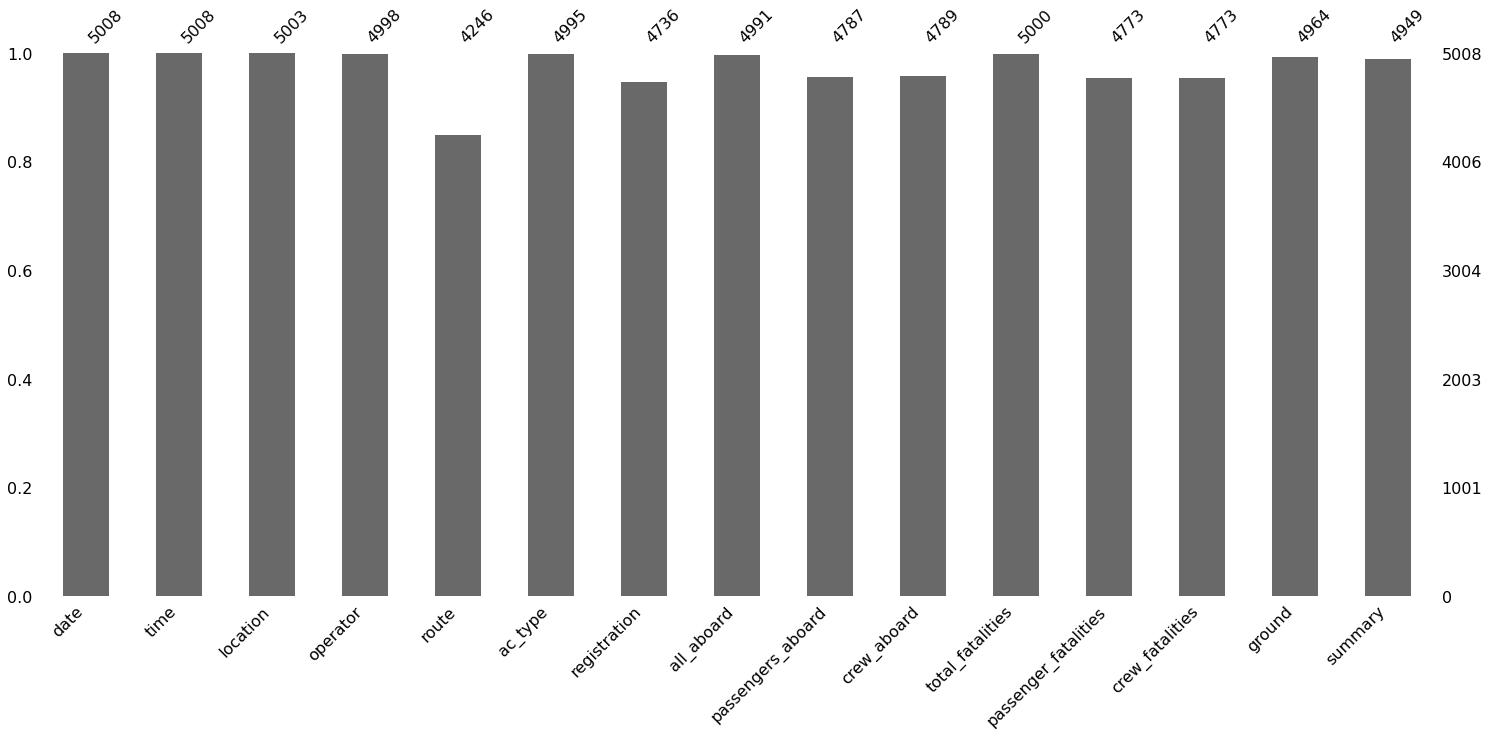

In [411]:
#importamos libreria de missingno para ver los faltantes
#[import library to see nulls in graphic]
#pip install missingno 
import missingno as msno
msno.bar(flight_accident)
plt.show()

In [412]:
flight_accident[flight_accident['all_aboard'].isna()]

,date,time,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary
26,1919-07-21,16:55,"Chicago, Illinois",Wingfoot Air Express Goodyear Tire,Shuttle,FD Type Dirigible,NaN,NaN,NaN,NaN,3,2,1,10,"The dirigible, cruising at 1,200 ft. caught fi..."
103,1925-09-07,00:00,"Toul, France",CIDNA,NaN,Spad 33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,1934-08-10,00:00,"Ningbo, China",China National Aviation Corporation,NaN,Sikorsky S-38B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,1935-08-13,00:00,"Hangow, China",China National Aviation Corporation,NaN,Sikorsky S-38B,NV40V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Destoryed in a storm.
451,1936-12-26,00:00,"Nanking, China",China National Aviation Corporation,NaN,Douglas DC-2,NC14269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
652,1942-10-01,00:00,"Kunming, China",China National Aviation Corporation,NaN,Douglas C-47,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crashed while attempting to land after losing ...
754,1944-11-09,00:00,"Seljord, Norway",Military - U.S. Army Air Corps,NaN,NaN,42-52196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,1946-03-18,00:00,"Between Chungking and Shanghai, China",China National Aviation Corporation,Chunking - Shanghai,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disappeared while en route. Plane never located.
1231,1951-01-20,00:00,"Huilyo, Peru",Military - TAM,NaN,Douglas DC-3,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN
1362,1952-12-22,00:00,"Damascus, Syria",Syrian Air,NaN,Douglas DC-3,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN


In [413]:
# Faltan muchos datos en todas las columnas, por lo que no es posible inferir un valor - eliminar
# [many missing value in several columns. Imposible to inffer the true value] - drop
flight_accident.dropna(subset=['passengers_aboard'], inplace=True)

In [414]:
flight_accident.shape

(4787, 15)

In [415]:
# Veamos como estan los nulos
# Let's check null % again
na_ratio = ((flight_accident.isnull().sum() / len(flight_accident))*100).sort_values(ascending = False)
print(na_ratio)

route                   12.554836
registration             3.760184
ground                   0.584917
summary                  0.543138
crew_fatalities          0.417798
passenger_fatalities     0.396908
operator                 0.146229
location                 0.104450
ac_type                  0.083560
crew_aboard              0.020890
date                     0.000000
time                     0.000000
all_aboard               0.000000
passengers_aboard        0.000000
total_fatalities         0.000000
dtype: float64


In [416]:
# Veamos que hay en 'ground'
# Take a look on 'ground'
flight_accident[flight_accident['ground'].isna()]

,date,time,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary
234,1930-10-13,00:00,"Perth, Australia",Wings Ltd,NaN,de Havilland DH.80 Puss Moth,VH-UPC,3,2,1,3,2,1,NaN,"Fflying over the Darling Range, aircraft went ..."
239,1930-11-18,20:00,"Techachapi Mountains, California",Pacific Air Transport,"Burbank, CA - Oakland, CA",Boeing 40,NC5340,3,0,3,3,0,3,NaN,Crashed into a mountainside at an altitude of ...
322,1933-11-09,22:35,"Portland, Oregon",United Air Lines,"Seattle, WA - Dallas, TX",Boeing 247,NC13345,10,7,3,4,3,1,NaN,Crashed in a thickly wooded area upon taking o...
324,1933-11-20,00:00,"Near Tsinan, China",China National Aviation Corporation,Canton - Shanghai,Stinson,NaN,8,7,1,8,7,1,NaN,Crashed into the Chingshan mountain range in fog.
465,1937-06-20,00:00,NaN,ENTA,San José San Isidro de El General,Travel Air 6000,TI-3,6,5,1,6,5,1,NaN,Hit trees and crashed in an isolated area loca...
481,1937-11-12,00:00,"Warsaw, Poland",LOT,Krakow - Warsaw,Lockhed 10 Electra,SP-AYD,11,9,2,4,2,2,NaN,On final approach at night and in poor visibil...
515,1938-07-19,00:00,Andes,Panagra,NaN,Douglas DC-2,NC14272,4,0,4,4,0,4,NaN,Disappeared over the Andes mountains. Wreckage...
571,1939-11-20,00:00,"Gosport, England",British Airways,Training,Airspeed Oxford,G-AFFM,2,0,2,2,0,2,NaN,Collided with the mooring of a ballon.went out...
632,1942-02-19,00:00,"Zhengzhou-Xinzheng, China",China National Aviation Corporation,NaN,Douglas DC-2,45,1,0,1,1,0,1,NaN,Crashed under unknown circumstances.
829,1945-11-13,20:15,"Near Tacloban, Philippines",Australian National Airways,NaN,Douglas C-48,VH-CDC,17,14,3,16,13,3,NaN,Crashed into the sea afte an aborted landing a...


Por lo que vemos en las descripciones, la mayoría fueron vuelos que fallaron en las montañas/lugares desconocidos. Podemos asumir que no hubo fallecidos en tierra.
[According to the description, many of these where plane that crash in remote or unknown areas, therefore, we can assume zero fatalities on ground was made]

In [417]:
# llenamos los valores con 0 para ground
# [Fill values with 0]
flight_accident['ground'] = flight_accident['ground'].fillna(0)

In [418]:
# Antes de seguir vamos a convertir los datos a num
# [Convert datatype to numeric]

flight_accident['all_aboard'] = flight_accident['all_aboard'].astype(int)
flight_accident['total_fatalities'] = flight_accident['total_fatalities'].astype(int)

In [419]:
# Ya que no se hará una diferenciación entre pasajeros y tripulación. Dejaremos las columnas generales
# [As we are not making diference between crew and passenger]

In [420]:
flight_accident['total_fatalities'].describe()

count    4787.000000
mean       22.461249
std        35.611768
min         0.000000
25%         4.000000
50%        11.000000
75%        25.000000
max       583.000000
Name: total_fatalities, dtype: float64

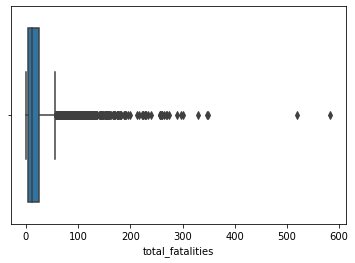

In [421]:
# El max parece un poco elevado. Veamos los números un boxplot
# [max is too much. Let's see if we can catch any outlier]

sns.boxplot(x = 'total_fatalities', data = flight_accident)
plt.show()

In [422]:
# eran aviones con mayor cantidad de pasajeros. Los datos están ok
# [More people on board, and more fatalieites.]
flight_accident[flight_accident['total_fatalities']>300]

,date,time,location,operator,route,ac_type,registration,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary
2737,1974-03-03,11:41,"Near Ermenonville, France",Turkish Airlines (THY),Paris - London,McDonnell Douglas DC-10-10,TC-JAV,346,335,11,346,335,11,0,The aircraft crashed shortly after takeoff fro...
2902,1977-03-27,17:07,"Tenerife, Canary Islands",Pan American World Airways / KLM,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,644,614,30,583,560,23,0,Both aircraft were diverted to Tenerife becaus...
3093,1980-08-19,19:08,"Riyadh, Saudi Arabia",Saudi Arabian Airlines,Riyadh - Jeddah,Lockheed 1011-200 TriStar,HZ-AHK,301,287,14,301,287,14,0,The flight experienced a fire in the aft cargo...
3337,1985-06-23,07:15,"Atlantic Ocean, 110 miles West of Ireland",Air India,Montreal - London,Boeing B-747-237B,VT-EFO,329,307,22,329,307,22,0,The aircraft broke up in flight and crashed in...
3341,1985-08-12,18:56,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,Tokyo - Osaka,Boeing B-747-SR46,JA8119,524,509,15,520,505,15,0,The aircraft suffered an aft pressure bulkhead...
4057,1996-11-12,18:40,"Near Charkhi Dadri, India",Saudi Arabian Airlines / Kazakhstan Airlines,New Delhi - Dhahran / Chimkent - New Delhi,Boeing B-747-168B / Ilyushin IL-76TD,HZ-AIH/UN-76435,349,316,33,349,316,33,0,Midair collision 17 km W of New Delhi. The Sa...


Definición de las variables finales

In [423]:
#como no haremos distinción de pasajeros y tripulación para el análisis. Dejaremos fuera las columnas que lo dividen
#[as we won't make a difference between ]
flight_accident.drop(['passengers_aboard'], axis=1, inplace=True)
flight_accident.drop(['crew_aboard'], axis=1, inplace=True)
flight_accident.drop(['passenger_fatalities'], axis=1, inplace=True)
flight_accident.drop(['crew_fatalities'], axis=1, inplace=True)


In [424]:
#check 
flight_accident.head(2)

,date,time,location,operator,route,ac_type,registration,all_aboard,total_fatalities,ground,summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,2,1,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,00:00,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,1,1,0,Eugene Lefebvre was the first pilot to ever be...


Remplazaremos los valores faltantes (en string) por 'desconocido' [We replace the null values (str) for 'Unknown']

In [425]:
flight_accident['location'] = flight_accident['location'].fillna('Unknown')
flight_accident['operator'] = flight_accident['operator'].fillna('Unknown')
flight_accident['route'] = flight_accident['route'].fillna('Unknown')

In [426]:
# Veamos los nulos
# Check null again
na_ratio = ((flight_accident.isnull().sum() / len(flight_accident))*100).sort_values(ascending = False)
print(na_ratio)

registration        3.760184
summary             0.543138
ac_type             0.083560
date                0.000000
time                0.000000
location            0.000000
operator            0.000000
route               0.000000
all_aboard          0.000000
total_fatalities    0.000000
ground              0.000000
dtype: float64


In [427]:
flight_accident['time']

0       17:18
1       00:00
2       06:30
3       00:00
6       01:00
        ...  
5003    18:35
5004    18:00
5005    08:00
5006    11:30
5007    15:00
Name: time, Length: 4787, dtype: object

### Ahora que tenemos las columnas que se consideran importantes, podemos ver relaciones [Now that we have all the features we consider important, is posible to check some relations]

Veamos los vuelos por 'operador' ['Let's check flight by operator']

In [428]:
flight_accident.groupby(['operator']).sum()
# parece necesitar un poco de normalización pero no hay tiempo -.-
# looks like this need some normalization but shortime

,all_aboard,total_fatalities
operator,,
46826/109,33,1
A B Aerotransport,17,3
AB Aerotransport,71,65
ACES Colombia,41,40
ADC Airlines,160,97
...,...,...
Zantop International Airlines,4,4
de Havilland Air Service,4,4
de Havilland Dove,7,6


In [429]:
# que tal por localización?
# [what abbout location?]
flight_accident.groupby(['location']).sum()

,all_aboard,total_fatalities
location,,
"1,200 miles off Dakar, Atlantic Ocean",52,52
"110 miles SW of Sochi, Russia",78,78
"125 miles ENE of Tokyo, Japan",6,6
175 miles off the Egyptian coast,66,66
"200 miles NE of Derby, Australia",4,4
...,...,...
"Zhengzhou-Xinzheng, China",1,1
"Zifta, Egypt",4,4
"Zurich, Switzerland",145,99


In [430]:
flight_accident['operator'].unique().tolist()

['Military - U.S. Army',
 'Unknown',
 'Military - U.S. Navy',
 'Private',
 'Military - German Navy',
 'US Aerial Mail Service',
 'Caproni Company',
 'Aircraft Transport and Travel',
 'Aircraft Travel Transport',
 'Compañia Colombiana de Navegación Aérea',
 'By Air',
 'Latecoere Airlines',
 'Handley Page Transport',
 'Aeropostale',
 'Military - Royal Australian Air Force',
 'Military - Royal Airship Works',
 'Franco-Roumaine',
 'West Australian Airways',
 'Aero Limited',
 'Daimler Airways / Grands Express Aeriens',
 'Cie des Messageries Aeriennes',
 'Compagnie Franco-Roumaine de Navigaation Aerienne',
 'Grands Express Aeriens',
 'de Havilland Air Service',
 "Amee de l'Air",
 'Grands Express Aeriens (Air Union)',
 'Air Union',
 'Campagnie France Roumaine',
 'Daimler Airways',
 'CCCP',
 'KLM Royal Dutch Airlines',
 'SCADTA',
 'Imperial Airways',
 'Zakavia',
 'Lignes Aeriennes Latecoere',
 'CIDNA',
 'Deutche Lufthansa',
 'Compagnie Internationale de Navigation Aérienne',
 'Deutsche Lufthan

In [431]:
# vamos a crear unas columnas nuevas para poner países
#[new column for countries, to make easy some groups]
#s = flight_accident['location'].str.split(',')
#flight_accident['accident_location'] = s.str[-1]
#flight_accident['city'] = s.str[0]
#flight_accident['second_name'] = s1.str[1]

In [432]:
#df_loc = flight_accident.groupby(['accident_location']).sum()

In [433]:
#df_loc.sort_values('total_fatalities', ascending=False)

In [434]:
flight_accident.groupby(['ac_type']).sum()

,all_aboard,total_fatalities
ac_type,,
A-7D Corsair,11,10
AAC-1 Toucan,27,23
AEGK,5,5
AT L98 Carvair,6,4
ATR 42-300,56,56
...,...,...
de Havilland Dragon 1,6,3
de Hvilland 89A Dragon Rapide,6,6
de havilland 89 Dragon Rapide,7,7


In [435]:
flight_accident.tail()

,date,time,location,operator,route,ac_type,registration,all_aboard,total_fatalities,ground,summary
5003,2021-03-28,18:35,"Near Butte, Alaska",Soloy Helicopters,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,6,5,0,The sightseeing helicopter crashed after missi...
5004,2021-05-21,18:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,Unknown,Beechcraft B300 King Air 350i,NAF203,11,11,0,"While on final approach, in poor weather condi..."
5005,2021-06-10,08:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Naypyidaw - Anisakan,Beechcraft 1900D,4610,14,12,0,The plane was carrying military personnel and ...
5006,2021-07-04,11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,96,50,3,"While attempting to land at Jolo Airport, the ..."
5007,2021-07-06,15:00,"Palana, Russia",Kamchatka Aviation Enterprise,Petropavlovsk - Palana,Antonov An 26B-100,RA-26085,28,28,0,The passenger plane crashed into the top of a ...


In [436]:
flight_accident.drop(['summary'], axis=1, inplace=True)

### Conexión a la base de datos

Utilizaremos sql alchemy y lo conectaremos a una base de datos mysql

In [439]:
#importar sqlalquemy para conectar a la base de datos y pymysql para usar sentencias sql
#[import library]

import sqlalchemy as db
import pymysql

#Se prepara la conexión para la prueba. Luego hay que pasar las variables de entorno a un .env e importarlas en este .ipynb
# [prepare all conection in out .env]
from dotenv import load_dotenv
import os
load_dotenv()

database_username= os.getenv('DATABASE_USERNAME')
database_password= os.getenv('DATABASE_PASSWORD')
database_ip= os.getenv('DATABASE_IP')
database_name=os.getenv('DATABASE_NAME')

In [440]:
# Conectamos con mysql
# [Connect with MySQL]

database_conection=db.create_engine(f"mysql+pymysql://{database_username}:{database_password}@{database_ip}/{database_name}")
conect=database_conection.connect()
metadata=db.MetaData()

In [441]:
# carga del dataset limpio a SQL
# Load data (after etl) to SQL
flight_accident.to_sql(con=conect, name='accident', if_exists='append', index=False)

4787